<h1> The Normal Distributiion</h1>


<h2>Getting probability related to precalculated Z scores</h2>

In [1]:
from scipy.stats import norm

# Calculate the cumulative probability of a z-score less than 1.5
prob = norm.cdf(1.5)

# Print the p-value
print(prob)

0.9331927987311419


In [2]:
# Calculate the cumulative probability of a z-score less than 3.0
prob = norm.cdf(3.0)

# Print the p-value
print(prob)

0.9986501019683699


<h2>Let's take a look at the Pima diabetes dataset</h2>

In [3]:
import pandas as pd
filename = "C:\\Users\\doylef\\Desktop\\NNSE_784\\course_lectures\\data\\health\\pima-diabetes.data.csv"
df = pd.read_csv(filename)
df.head()

,preg,gluc,bp,skin,insulin,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h2>Let's use scipy to calculate the z-scores for a column</h2>

In [4]:
from scipy.stats import zscore
gluc_z = zscore(df['gluc'])
type(gluc_z)

pandas.core.series.Series

In [5]:
#we will create a new datframe and put the 'gluc' column and associated 
#z-scores in it to be less cluttered
z_df = pd.DataFrame()
z_df['gluc'] = df['gluc']
z_df['z_score'] = gluc_z
z_df.head()

,gluc,z_score
0,148,0.848324
1,85,-1.123396
2,183,1.943724
3,89,-0.998208
4,137,0.504055


In [6]:
z_df.describe()

,gluc,z_score
count,768.000000,7.680000e+02
mean,120.894531,3.614007e-18
std,31.972618,1.000652e+00
min,0.000000,-3.783654e+00
25%,99.000000,-6.852363e-01
50%,117.000000,-1.218877e-01
75%,140.250000,6.057709e-01
max,199.000000,2.444478e+00


<h2>Here we are using the pandas "apply()" method to perform a complicated (method/function) calculation on each cell in the specified column</h2>
We are using the pandas.series.apply() method (remember each column on a dataframe is a series). This applies the specified method to each value in the series. There is a pandas.dataframe.apply() method that works similarly but across rows or down columns (depending on spcified "axis") of an entire dataframe. 

In [7]:
from scipy.stats import norm
#apply() allows us to use a method to calculate a value for each cell in the specified column
#we do this and assign the values to a new column "cdf" as we are calculating the cumulative 
#probability for values lee than the one observed
z_df['cdf'] = z_df['z_score'].apply(norm.cdf)
z_df.head()

,gluc,z_score,cdf
0,148,0.848324,0.801871
1,85,-1.123396,0.130635
2,183,1.943724,0.974036
3,89,-0.998208,0.159089
4,137,0.504055,0.692889


In [8]:
# sort the dataframe by the z_score
df_sorted = z_df.sort_values( by ='z_score')
df_sorted.tail()

,gluc,z_score,cdf
228,197,2.381884,0.991388
408,197,2.381884,0.991388
8,197,2.381884,0.991388
561,198,2.413181,0.992093
661,199,2.444478,0.992747


<AxesSubplot:xlabel='gluc', ylabel='Count'>

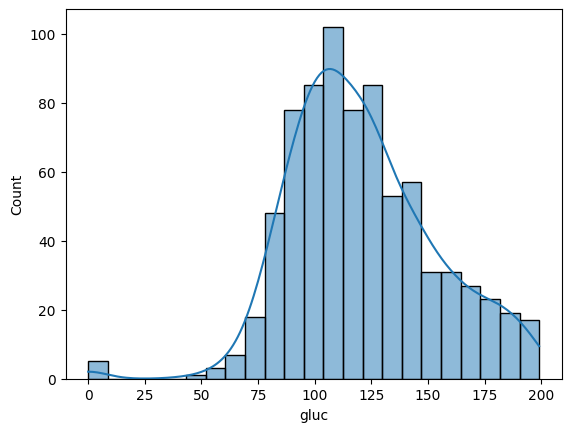

In [9]:
import seaborn as sns
sns.histplot(df['gluc'], kde=True)

In [10]:
df['gluc'].mode()

0     99
1    100
dtype: int64

In [11]:
df.head()


,preg,gluc,bp,skin,insulin,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#first, for readability, set the two values in a list
stdev = df['gluc'].std()
range = [(df['gluc'].mean() - stdev),(df['gluc'].mean() + stdev)]
count = 0
for value in df['gluc']:
    if value > range[0] and value < range[1]:
        count = count + 1
print("Count within 1 standard deviation is {}.".format(count))
percentage = (count / df['gluc'].size) * 100
print("This is {}% of all values.".format(percentage))

Count within 1 standard deviation is 540.
This is 70.3125% of all values.


In [13]:
#first, for readability, set the two values in a list
range = [(df['gluc'].mean() - (2*stdev)),(df['gluc'].mean() + (2*stdev))]
count = 0
for value in df['gluc']:
    if value > range[0] and value < range[1]:
        count = count + 1
print("Count within 2 standard deviation is {}.".format(count))
percentage = (count / df['gluc'].size) * 100
print("This is {}% of all values.".format(percentage))

Count within 2 standard deviation is 732.
This is 95.3125% of all values.


((array([-3.12069362e+00, -2.84945435e+00, -2.69768447e+00, -2.59044160e+00,
         -2.50664754e+00, -2.43745274e+00, -2.37827016e+00, -2.32640403e+00,
         -2.28013073e+00, -2.23827901e+00, -2.20001550e+00, -2.16472534e+00,
         -2.13194152e+00, -2.10130063e+00, -2.07251420e+00, -2.04534920e+00,
         -2.01961466e+00, -1.99515202e+00, -1.97182811e+00, -1.94953002e+00,
         -1.92816110e+00, -1.90763799e+00, -1.88788828e+00, -1.86884861e+00,
         -1.85046325e+00, -1.83268292e+00, -1.81546377e+00, -1.79876666e+00,
         -1.78255649e+00, -1.76680162e+00, -1.75147347e+00, -1.73654612e+00,
         -1.72199598e+00, -1.70780152e+00, -1.69394305e+00, -1.68040247e+00,
         -1.66716316e+00, -1.65420979e+00, -1.64152817e+00, -1.62910519e+00,
         -1.61692865e+00, -1.60498724e+00, -1.59327041e+00, -1.58176831e+00,
         -1.57047175e+00, -1.55937212e+00, -1.54846135e+00, -1.53773186e+00,
         -1.52717653e+00, -1.51678867e+00, -1.50656194e+00, -1.49649040e+00,

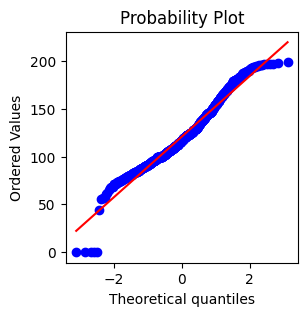

In [14]:
##probability plot to help assess normality
import matplotlib.pyplot as plt
import scipy
fig, ax = plt.subplots(figsize=(3, 3))
scipy.stats.probplot(df['gluc'], plot=ax)

In [15]:
#we can also use the scipy.stats.normaltest (an implementation of D'Agostino and Pearson's test) 
#to check normality. The null hypothesis for this test is that the sample population is normal
#a low p-value means we should reject the null hypotheses
scipy.stats.normaltest(df['gluc'])

NormaltestResult(statistic=12.385056622689767, pvalue=0.0020446506991363502)